#Linear Autoencoder

# Import relevant Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

# Loading the dataset
https://keras.io/api/datasets/mnist

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

# Visualize the images randomly

Label:1


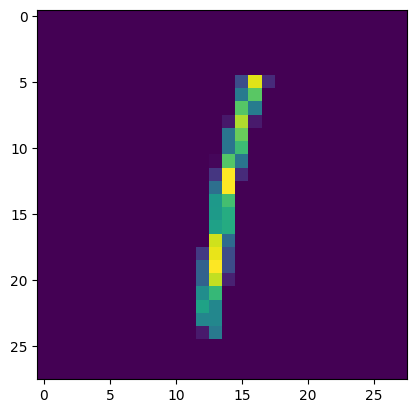

In [8]:
i = np.random.randint(0, 59999)

print(f'Label:{y_train[i]}')
plt.imshow(X_train[i]);

Label:4


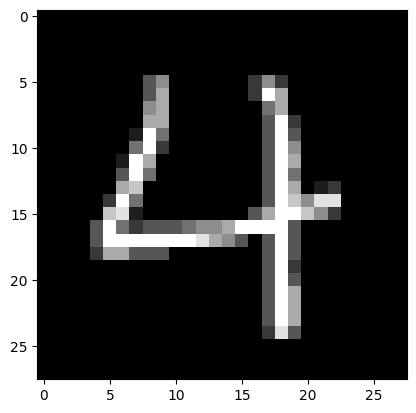

In [9]:
i = np.random.randint(0, 59999)

print(f'Label:{y_train[i]}')
plt.imshow(X_train[i], cmap='gray');

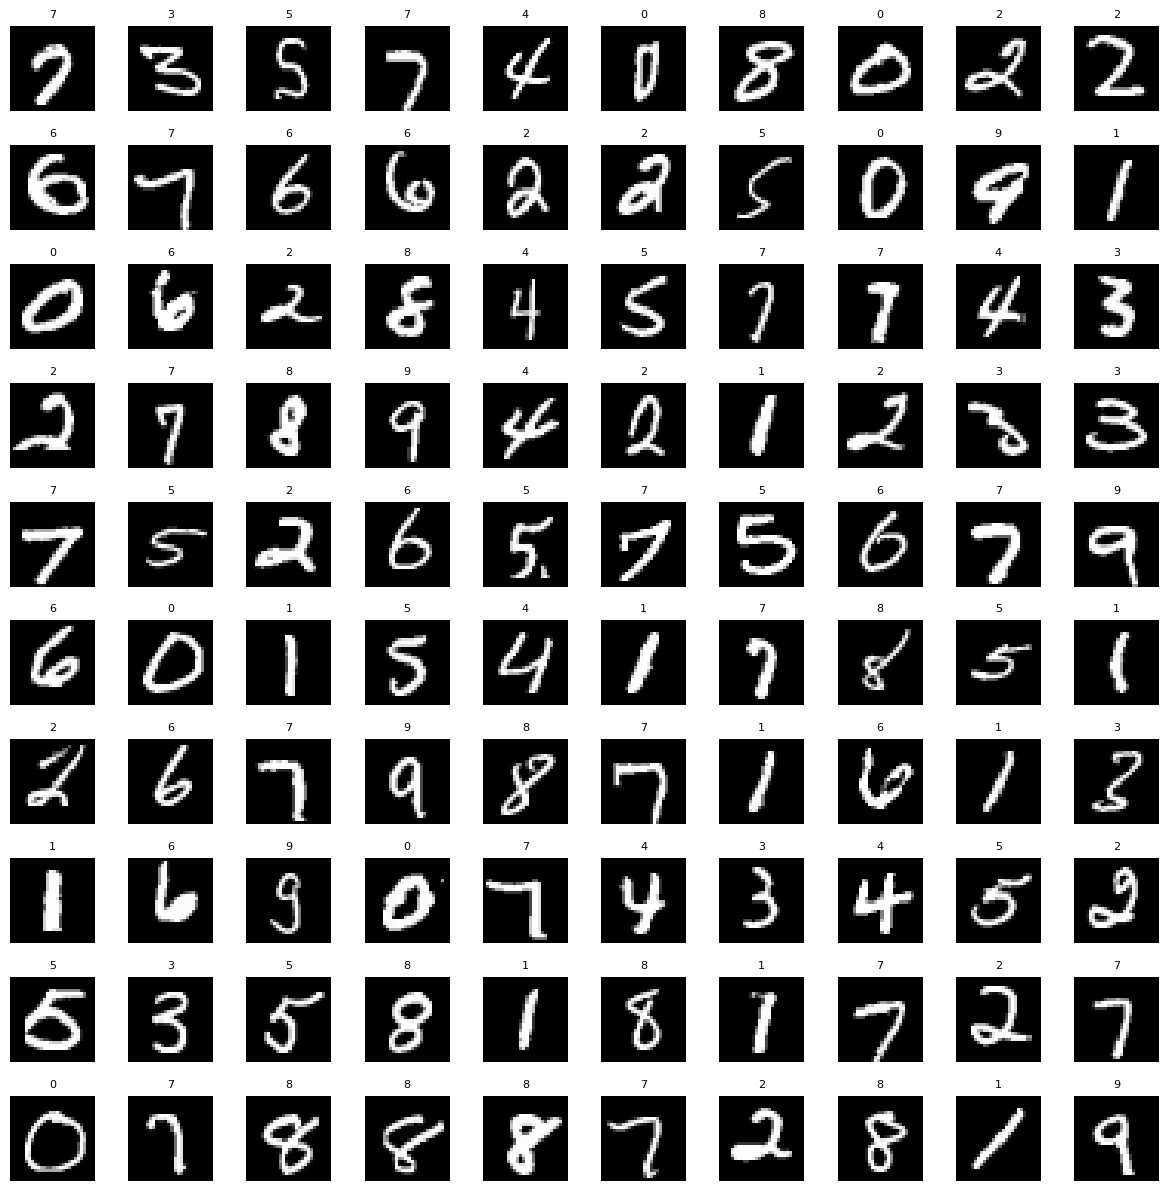

In [10]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize=(15, 15)) # creates a 10x10 axes canvas for displaying the images of axes=10x10 = 100
axes = axes.ravel() # since the axes is a matrix, we convert it to vector to fit in the canvas 1.e. axes = (10,10) -> 100
for i in np.arange(0, width*height):
  index = np.random.randint(0, 59999)
  axes[i].imshow(X_train[index], cmap='gray')
  axes[i].set_title(y_train[index], fontsize=8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Preprocessing the Images

In [11]:
# vecotrize the images
X_train[0].min(), X_train[0].max()


(0, 255)

In [12]:
X_test[0].min(), X_test[0].max()

(0, 255)

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [15]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [16]:
X_train.shape  # (60000 images, 28 rows, 28 columns)

(60000, 28, 28)

In [17]:
X_test.shape # (10000 images, 28 rows, 28 columns)

(10000, 28, 28)

In [18]:
# Reshaping to flatten all images to a single vector
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(60000, 28, 28)

In [19]:
X_test.shape[0], X_test.shape[1], X_test.shape[2]

(10000, 28, 28)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])

In [21]:
X_train.shape # 60000 images in a 784 row vector

(60000, 784)

In [22]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [23]:
X_test.shape # 10000 images in a 784 row vector

(10000, 784)

# Building and Training the Linear Autoencoder

In [24]:
# linear autoencoder structure
# 784 - 128 - 64 - 32 - 64 - 128 - 784
# input - conv1 - conv2 - coding - decoding - conv3  - output

In [25]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units= 128, activation='relu', input_dim=784))
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=32, activation='relu'))

# Decode
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=128, activation='relu'))
autoencoder.add(Dense(units=784, activation='sigmoid'))

In [26]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [27]:
# compile the autoencoder
autoencoder.compile(optimizer='Adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [28]:
autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1512 - accuracy: 0.0098
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1084 - accuracy: 0.0111
Epoch 3/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0993 - accuracy: 0.0121
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0951 - accuracy: 0.0125
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0925 - accuracy: 0.0124
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0905 - accuracy: 0.0137
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0889 - accuracy: 0.0135
Epoch 8/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0876 - accuracy: 0.0132
Epoch 9/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0866 - accuracy: 0.0136
Epoch 10/20
1875/1875 [==============================] - 12s 7ms/step - l

# Encoding the Images

In [29]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [30]:
autoencoder.get_layer('dense_2').output # the coding output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [31]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('dense_2').output)

In [32]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110816 (432.88 KB)
Trainable params: 110816 (432.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


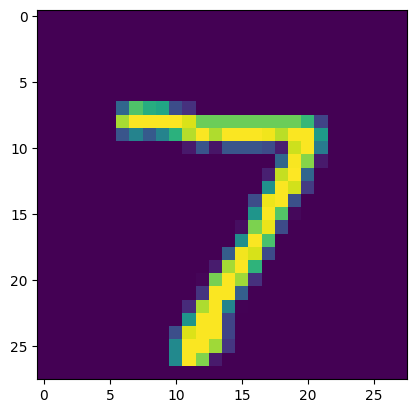

In [33]:
# Test encoder
plt.imshow(X_test[0].reshape(28, 28));

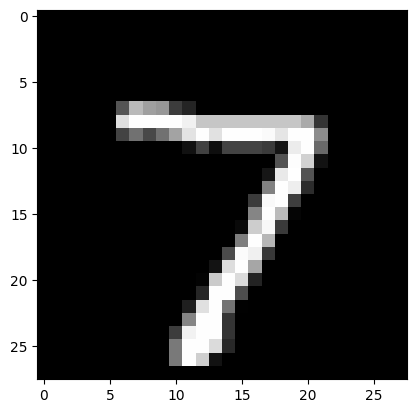

In [34]:
plt.imshow(X_test[0].reshape(28, 28), cmap='gray');

In [35]:
X_test[0].shape

(784,)

In [36]:
X_test[0].reshape(1, -1).shape # means add 1 image with 784 flattened pixel

(1, 784)

In [37]:
encoded_image = encoder.predict(X_test[0].reshape(1, -1))

1/1 [==============================] - 0s 134ms/step


In [38]:
encoded_image, encoded_image.shape

(array([[ 2.6915116, 10.104735 ,  5.936289 ,  7.120371 ,  2.0202656,
          7.2540607,  0.       ,  8.283852 ,  9.688479 ,  4.1107597,
          4.905629 ,  4.983111 ,  6.5619   ,  2.543543 ,  3.8209198,
          6.225405 ,  3.610655 ,  2.8122864,  5.1412067,  8.697386 ,
          5.9539943,  0.       ,  0.       ,  4.051135 ,  3.6389184,
          9.071671 ,  3.1833665,  6.4761963,  4.3582053,  1.0117543,
          5.120881 , 10.415341 ]], dtype=float32),
 (1, 32))

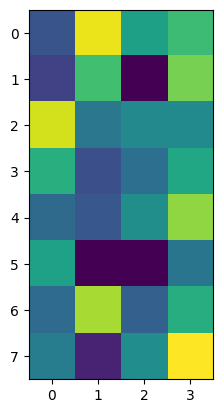

In [39]:
plt.imshow(encoded_image.reshape(8,4));

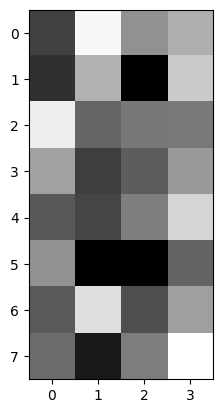

In [40]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray');

# Decoding the Images

In [41]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [42]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]

decoder = Model(inputs=input_layer_decoder, outputs=decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))

In [43]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 93ms/step


In [44]:
decoded_image.shape

(1, 784)

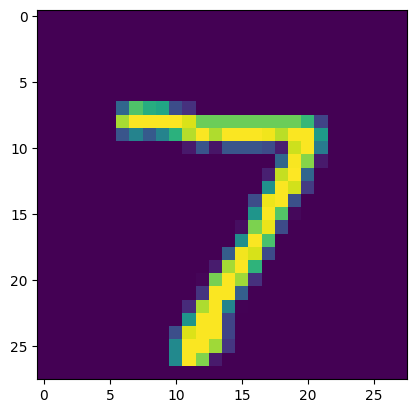

In [45]:
plt.imshow(X_test[0].reshape(28, 28)); # original input image encoded

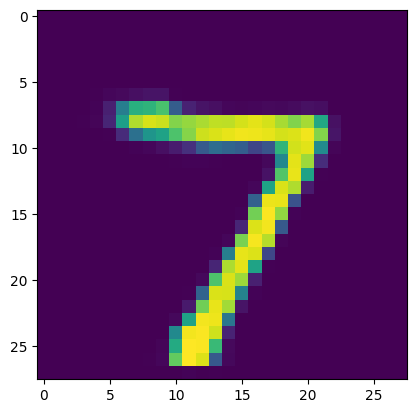

In [46]:
plt.imshow(decoded_image.reshape(28, 28));

In [47]:
X_test.shape[0] # 9999

10000

1/1 [==============================] - 0s 20ms/step


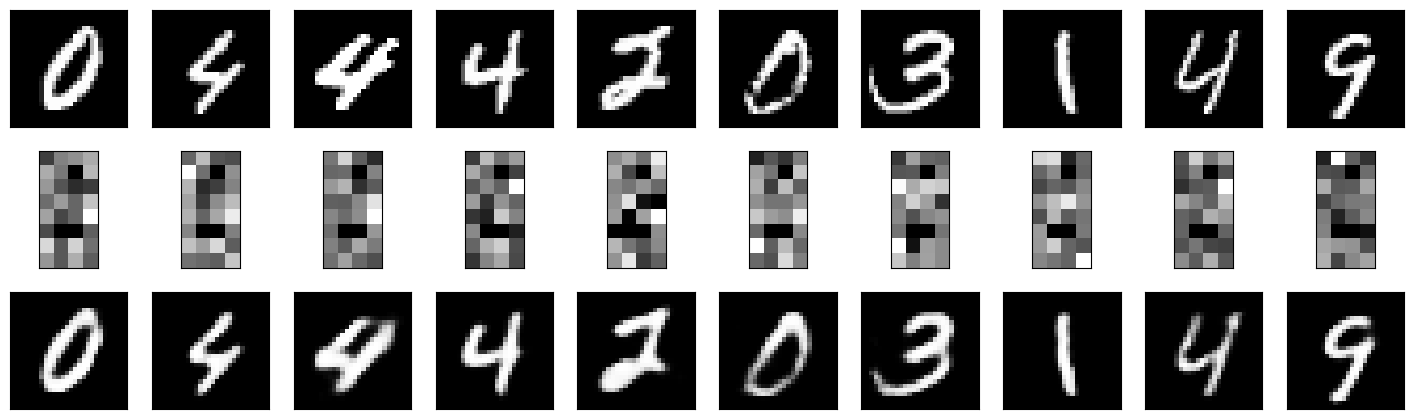

In [48]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, size = n_images)
#print(test_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  #print(i, image_index)
  # Original image
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10,i + 1 + n_images)
  encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
  plt.imshow(encoded_image.reshape(8,4), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())